In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 

In [6]:
### try with RandomForest

In [8]:
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.96435, 0.9637 , 0.9659 ])

In [16]:
### try with Kneighbors

In [34]:
kneighbors_clf = KNeighborsClassifier()
kneighbors_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
cross_val_score(kneighbors_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9676 , 0.9671 , 0.96755])

In [22]:
### Trying to improve Knn with grid search

In [30]:
param_grid = {
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [31]:
grid_search.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [32]:
kneighbors_clf = KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')
kneighbors_clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [33]:
cross_val_score(kneighbors_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9704, 0.9689, 0.9687])

In [ ]:
### try with scaled X

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [39]:
kneighbors_clf = KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')
kneighbors_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [41]:
cross_val_score(kneighbors_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.9398, 0.942 , 0.9429])

In [42]:
### best model

In [46]:
kneighbors_clf = KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')
kneighbors_clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [44]:
### predictions

In [47]:
predictions = kneighbors_clf.predict(X_test)

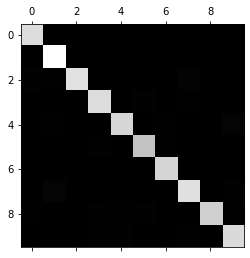

In [48]:
conf_mx = confusion_matrix(y_test, predictions)

plt.matshow(conf_mx, cmap=plt.cm.gray)

In [49]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

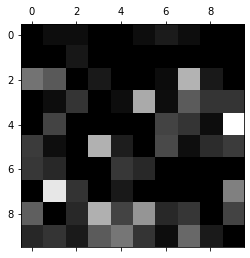

In [50]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      1.00      0.98      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.97      0.96      1028
           8       0.99      0.95      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

